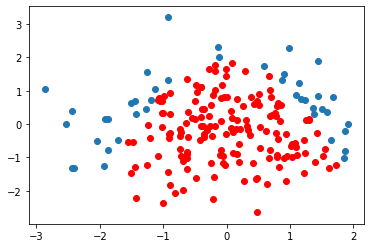

In [44]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.normal(0, 1, size=(200,2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 2, dtype='int')

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], color='r')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.8133333333333334
0.88


0.96
0.98


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'linewidth'


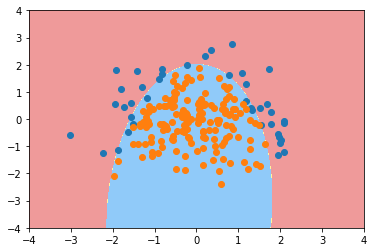

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def poly(degree=2, C = 1):
    return Pipeline([
        ('polyn', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lr', LogisticRegression(C=C))
    ])


def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


lr1 = poly(2, 1)
lr1.fit(X_train, y_train)
print(lr1.score(X_train, y_train))
print(lr1.score(X_test, y_test))

plot_decision_boundary(lr1, [-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()